This notebooks is an attempt to infere a home address based on twitter data from an user

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture # You can import this only if you are using 0.18+ sklearn.

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data/MrNaassir.csv')

In [3]:
data.head()

,Unnamed: 0,Unnamed: 0.1,UserID,Username,Tweeted_At,Tweet ID,Location,Geo,Place,Profile_Create_at,Retweeted_Count,Text,geometry,datetime
0,48249,52990,NaN,MrNaassir,Mon Feb 09 22:03:05 +0000 2015,564907364563025922,New Yark City.New York. U.S.A.,"{u'type': u'Point', u'coordinates': [40.690623...","{u'full_name': u'Queens, NY', u'url': u'https:...",Sat Jun 20 00:18:35 +0000 2009,0,@brookejune9 http://t.co/Wfs1gQQZ1K,POINT (40.6906234 -73.82367859999999),2015-02-09 22:03:05
1,48389,53130,NaN,MrNaassir,Mon Feb 09 21:58:41 +0000 2015,564906255731658753,New Yark City.New York. U.S.A.,"{u'type': u'Point', u'coordinates': [40.690586...","{u'full_name': u'Queens, NY', u'url': u'https:...",Sat Jun 20 00:18:35 +0000 2009,1,@b13436527cee4e9:@nsmo2 @Queen_manal @KmQlJjrq...,POINT (40.6905861 -73.82390989),2015-02-09 21:58:41
2,48562,53303,NaN,MrNaassir,Mon Feb 09 21:52:43 +0000 2015,564904752870600704,New Yark City.New York. U.S.A.,"{u'type': u'Point', u'coordinates': [40.690459...","{u'full_name': u'Queens, NY', u'url': u'https:...",Sat Jun 20 00:18:35 +0000 2009,0,@AfredoMM1965: @MrNaassir merci beaucoup ! \n\...,POINT (40.6904596 -73.82384273),2015-02-09 21:52:43
3,48583,53324,NaN,MrNaassir,Mon Feb 09 21:51:55 +0000 2015,564904552747773952,New Yark City.New York. U.S.A.,"{u'type': u'Point', u'coordinates': [40.690524...","{u'full_name': u'Queens, NY', u'url': u'https:...",Sat Jun 20 00:18:35 +0000 2009,1,@almohid @dermott_ann @GCHDutta @Domi52778 @Le...,POINT (40.69052428 -73.82379426999999),2015-02-09 21:51:55
4,48589,53330,NaN,MrNaassir,Mon Feb 09 21:51:34 +0000 2015,564904465212669952,New Yark City.New York. U.S.A.,"{u'type': u'Point', u'coordinates': [40.690524...","{u'full_name': u'Queens, NY', u'url': u'https:...",Sat Jun 20 00:18:35 +0000 2009,1,@royca60 @almohid @Leonor188 @dermott_ann @GCH...,POINT (40.69052428 -73.82379426999999),2015-02-09 21:51:34


In [4]:
str.split(data.geometry[0],' ')[2].replace(")", "") 

'-73.82367859999999'

In [5]:
#convert the data frame into geodataframe
y = [float(str.split(i,' ')[1].replace("(", "")) for i in data.geometry]
x = [float(str.split(i,' ')[2].replace(")", "")) for i in data.geometry]
data['x'] = x
data['y'] = y
data['geometry'] = [Point(xy) for xy in zip(data.x, data.y)]
data = gpd.GeoDataFrame(data, crs=None, geometry="geometry")

In [6]:
data.head()

,Unnamed: 0,Unnamed: 0.1,UserID,Username,Tweeted_At,Tweet ID,Location,Geo,Place,Profile_Create_at,Retweeted_Count,Text,geometry,datetime,x,y
0,48249,52990,NaN,MrNaassir,Mon Feb 09 22:03:05 +0000 2015,564907364563025922,New Yark City.New York. U.S.A.,"{u'type': u'Point', u'coordinates': [40.690623...","{u'full_name': u'Queens, NY', u'url': u'https:...",Sat Jun 20 00:18:35 +0000 2009,0,@brookejune9 http://t.co/Wfs1gQQZ1K,POINT (-73.82367859999999 40.6906234),2015-02-09 22:03:05,-73.823679,40.690623
1,48389,53130,NaN,MrNaassir,Mon Feb 09 21:58:41 +0000 2015,564906255731658753,New Yark City.New York. U.S.A.,"{u'type': u'Point', u'coordinates': [40.690586...","{u'full_name': u'Queens, NY', u'url': u'https:...",Sat Jun 20 00:18:35 +0000 2009,1,@b13436527cee4e9:@nsmo2 @Queen_manal @KmQlJjrq...,POINT (-73.82390989 40.6905861),2015-02-09 21:58:41,-73.823910,40.690586
2,48562,53303,NaN,MrNaassir,Mon Feb 09 21:52:43 +0000 2015,564904752870600704,New Yark City.New York. U.S.A.,"{u'type': u'Point', u'coordinates': [40.690459...","{u'full_name': u'Queens, NY', u'url': u'https:...",Sat Jun 20 00:18:35 +0000 2009,0,@AfredoMM1965: @MrNaassir merci beaucoup ! \n\...,POINT (-73.82384273 40.6904596),2015-02-09 21:52:43,-73.823843,40.690460
3,48583,53324,NaN,MrNaassir,Mon Feb 09 21:51:55 +0000 2015,564904552747773952,New Yark City.New York. U.S.A.,"{u'type': u'Point', u'coordinates': [40.690524...","{u'full_name': u'Queens, NY', u'url': u'https:...",Sat Jun 20 00:18:35 +0000 2009,1,@almohid @dermott_ann @GCHDutta @Domi52778 @Le...,POINT (-73.82379426999999 40.69052428),2015-02-09 21:51:55,-73.823794,40.690524
4,48589,53330,NaN,MrNaassir,Mon Feb 09 21:51:34 +0000 2015,564904465212669952,New Yark City.New York. U.S.A.,"{u'type': u'Point', u'coordinates': [40.690524...","{u'full_name': u'Queens, NY', u'url': u'https:...",Sat Jun 20 00:18:35 +0000 2009,1,@royca60 @almohid @Leonor188 @dermott_ann @GCH...,POINT (-73.82379426999999 40.69052428),2015-02-09 21:51:34,-73.823794,40.690524


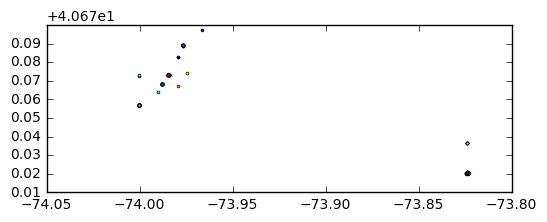

In [7]:
data.plot()

In [8]:
#convert date
data.datetime = pd.to_datetime(data.datetime)
#filter dates mondays tuesdays, wednesdays and thursday
weekdays = [i.weekday()<=4 for i in data.datetime]



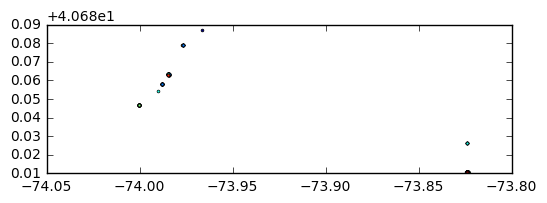

In [9]:
data.loc[weekdays,:].plot()

In [10]:
#filter hours from 8 pm to 1 am
homeHours = pd.Series([i.hour for i in data.datetime])
#homeHours.value_counts()

In [11]:
homeHoursFilter =  ((homeHours >= 20) | (homeHours <=2))
homeHoursFilter.sum()

445

In [12]:
dataFiltered = data.loc[weekdays & homeHoursFilter,:]

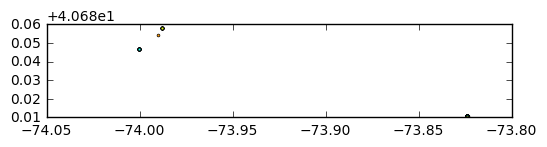

In [13]:
dataFiltered.plot()

In [14]:
X = dataFiltered.loc[:,['x','y']].values

In [15]:
maxK = 10
silhouScore = 0
finalClusters = 0

for n_clusters in range(2,maxK):
    #run the clustering
    
    gm=GaussianMixture(n_components=n_clusters,random_state=324)

    #assign labels of clusters
    cluster_labels=gm.fit(X).predict(X)

    #calculate average for each cluster
    silhouette_avg = silhouette_score(X, cluster_labels)
    if silhouette_avg > silhouScore:
        silhouScore = silhouette_avg
        finalClusters = n_clusters
        
print("For n_clusters ={},".format(finalClusters)+" the average silhouette_score is :{}".format(silhouScore))



For n_clusters =3, the average silhouette_score is :0.995532836709


In [16]:
gm=GaussianMixture(n_components=finalClusters,random_state=324)
res1=gm.fit(X)
dataFiltered['cluster'] = res1.predict(X)

/home/pipe/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


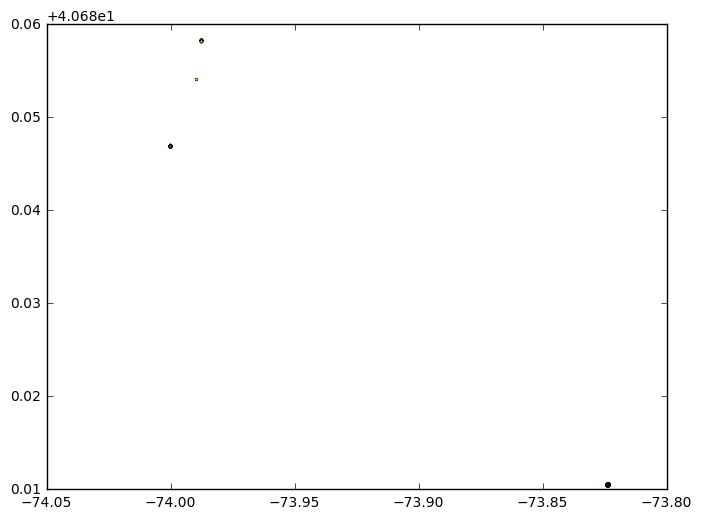

In [17]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
dataFiltered.plot(column = 'cluster',cmap='viridis',ax=ax)

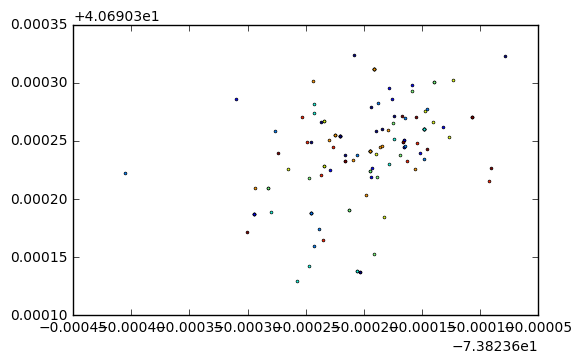

In [19]:
toSave = dataFiltered.loc[dataFiltered.cluster==0,['Tweet ID','x','y','geometry']]
toSave.plot()
gpd.GeoDataFrame.to_file(toSave,'shapes/mrNaasir.shp') 
